# **Implementación de un modelo de deep learning**
*Author: Myroslava Sánchez Andrade*
<br>*Creation date: 04/10/2022*
<br>*Last updated: 05/10/2022*

---
## **Extract**

The dataset used for this project is **[Kuzushiji-49](https://github.com/rois-codh/kmnist)**, downloaded from a GitHub repository. It contains 270,912 images (28x28 grayscale) that contains a total of 49 classes, 48 Hiragana characters and one Hiragana iteration mark (imbalanced dataset).

In [1]:
# REQUIRED LIBRARIES
# !pip install numpy tensorflow matplotlib joblib

In [2]:
# RUN ONLY FOR GOOGLE COLAB

from google.colab import drive

drive.mount("/content/gdrive")  

%cd "/content/gdrive/MyDrive/Colab Notebooks"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [12]:
# Importing the necessary libraries
import numpy as np
import tensorflow as tf
from numpy.ma.core import argmax
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib as mpl
from joblib import dump, load

---
## **Load**

In [ ]:
# Loading the datasets
def load(f):
    return np.load(f)['arr_0']

# Directory to be scanned
x_train = load('./data/original/k49-train-imgs.npz')
x_test = load('./data/original/k49-test-imgs.npz')
y_train = load('./data/original/k49-train-labels.npz')
y_test = load('./data/original/k49-test-labels.npz')

In [ ]:
x_train.shape

(232365, 28, 28)

---
## **Model (Convolutional Neural Network)**

In [6]:
# Loading the datasets
def load(f):
    return np.load(f)['arr_0']

x_train = load('./data/original/k49-train-imgs.npz')
x_test = load('./data/original/k49-test-imgs.npz')
y_train = load('./data/original/k49-train-labels.npz')
y_test = load('./data/original/k49-test-labels.npz')

# Importing classnames
class_names = np.recfromcsv('./data/k49_classmap.csv', delimiter=',', filling_values=np.nan, case_sensitive=True, deletechars='', replace_space=' ')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [8]:
# Adding the japanasese font
mpl.font_manager.fontManager.addfont('NotoSansJP[wght].ttf')
mpl.rc('font', family='Noto Sans JP')

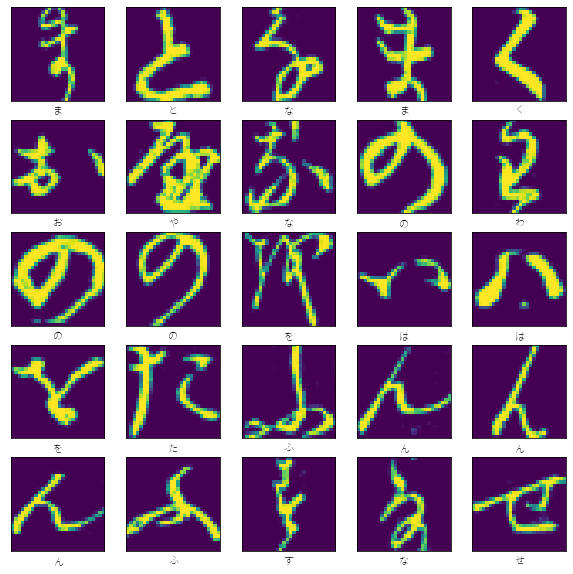

In [ ]:
# Printing the images with its character
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # Printing the characters
    plt.xlabel(class_names[y_train[i]][2])
plt.show()

In [ ]:
# Defining the first model
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(49))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 56)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 56)          28280     
                                                                 
 flatten_3 (Flatten)         (None, 504)              

In [ ]:
# Training the model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_test, y_test))

Epoch 1/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.6761 - accuracy: 0.8223 - val_loss: 0.6299 - val_accuracy: 0.8407
Epoch 2/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.2966 - accuracy: 0.9175 - val_loss: 0.5769 - val_accuracy: 0.8492
Epoch 3/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.2421 - accuracy: 0.9325 - val_loss: 0.5113 - val_accuracy: 0.8752
Epoch 4/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.2137 - accuracy: 0.9396 - val_loss: 0.4624 - val_accuracy: 0.8819
Epoch 5/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.1981 - accuracy: 0.9437 - val_loss: 0.4841 - val_accuracy: 0.8854
Epoch 6/30
7262/7262 [==============================] - 28s 4ms/step - loss: 0.1874 - accuracy: 0.9469 - val_loss: 0.4878 - val_accuracy: 0.8862
Epoch 7/30
7262/7262 [==============================] - 30s 4ms/step - loss: 0.1788 - accuracy: 0.9494 - val_loss: 0.4524 - val_ac

1205/1205 - 6s - loss: 0.5557 - accuracy: 0.8949 - 6s/epoch - 5ms/step
0.8949334621429443


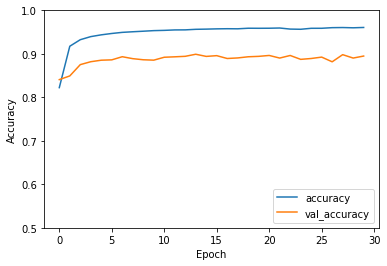

In [ ]:
# Plotting the accuracy of the training (train and validation)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

In [9]:
# Improving the model by adding more layers and dropout layers (to reduce overfitting)
improved_model = models.Sequential()
improved_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
improved_model.add(layers.LeakyReLU())
improved_model.add(layers.Dropout(0.3))
improved_model.add(layers.MaxPooling2D((2, 2)))
improved_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
improved_model.add(layers.LeakyReLU())
improved_model.add(layers.Dropout(0.3))
improved_model.add(layers.Flatten())
improved_model.add(layers.Dense(64, activation='relu'))
improved_model.add(layers.Dense(49))

improved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 11, 11, 128)       0         
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

In [10]:
# Training the improved model
improved_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = improved_model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_test, y_test))

Epoch 1/30
7262/7262 [==============================] - 42s 5ms/step - loss: 0.8033 - accuracy: 0.7905 - val_loss: 0.5442 - val_accuracy: 0.8545
Epoch 2/30
7262/7262 [==============================] - 31s 4ms/step - loss: 0.3428 - accuracy: 0.9044 - val_loss: 0.4404 - val_accuracy: 0.8820
Epoch 3/30
7262/7262 [==============================] - 31s 4ms/step - loss: 0.2931 - accuracy: 0.9185 - val_loss: 0.3975 - val_accuracy: 0.8967
Epoch 4/30
7262/7262 [==============================] - 34s 5ms/step - loss: 0.2732 - accuracy: 0.9243 - val_loss: 0.4002 - val_accuracy: 0.8943
Epoch 5/30
7262/7262 [==============================] - 31s 4ms/step - loss: 0.2601 - accuracy: 0.9278 - val_loss: 0.3840 - val_accuracy: 0.9030
Epoch 6/30
7262/7262 [==============================] - 34s 5ms/step - loss: 0.2487 - accuracy: 0.9310 - val_loss: 0.3737 - val_accuracy: 0.9024
Epoch 7/30
7262/7262 [==============================] - 31s 4ms/step - loss: 0.2437 - accuracy: 0.9322 - val_loss: 0.3732 - val_ac

In [13]:
dump(improved_model, 'model.joblib')

['model.joblib']

1205/1205 - 3s - loss: 0.3346 - accuracy: 0.9161 - 3s/epoch - 2ms/step
0.916102409362793


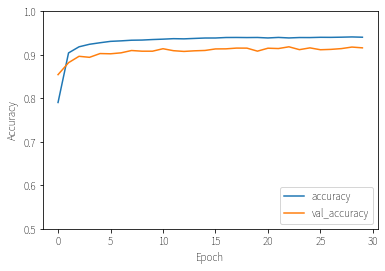

In [56]:
# Plotting the accuracy of the test
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = improved_model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

In [57]:
prediction = improved_model.predict(x_test)

1205/1205 [==============================] - 2s 2ms/step


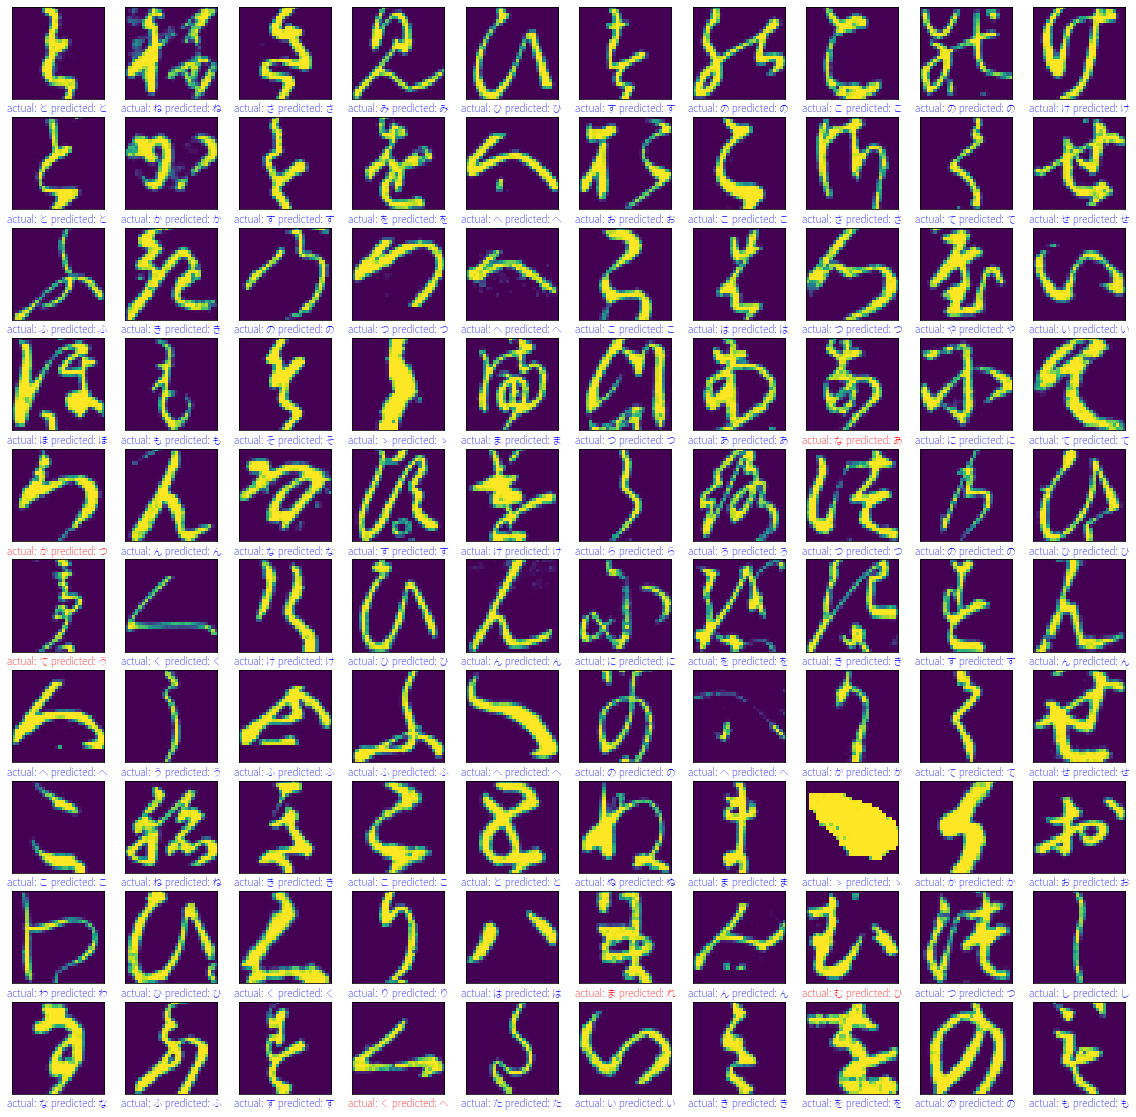

In [58]:
# Testing the improved model

# Printing the images with its character
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    # Printing the characters
    actual_value = class_names[y_test[i]][2]
    predicted_value = class_names[argmax(prediction[i])][2]
    plt.xlabel('actual: '+ actual_value + ' predicted: '+ predicted_value, color=('red' if actual_value != predicted_value else 'blue'))
plt.show()